In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [153]:

df = pd.read_csv('UkraineConflict.csv')
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ROU448,20-May-2019,2019,1,Political violence,Violence against civilians,Attack,Police Forces of Romania (2016-2019) Coast Guard,NaN,1,...,Coast of Constanta,44.156,28.948,2,Deschide; Hurriyet Daily; News.ro; CNN; TRT Haber,National-International,"On 20 May 2019, the Coast Guard of Romania fir...",0,NaN,1649875498
1,ROU1885,28-March-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Adevarul; G4media,National,"Defusal: On 28 March 2022, Romanian minesweepe...",0,NaN,1649184809
2,ROU1940,28-July-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 28 July 2022, Greenpeace activists proteste...",0,crowd size=no report,1659462993
3,ROU1945,31-July-2022,2022,1,Strategic developments,Strategic developments,Disrupted weapons use,Military Forces of Romania (2021-),NaN,1,...,Coast of Constanta,44.156,28.948,1,Digi24,National,"Defusal: On 31 July 2022, Romanian Naval Force...",0,NaN,1660055880
4,ROU1947,04-August-2022,2022,1,Demonstrations,Protests,Peaceful protest,Protesters (Romania),Greenpeace,6,...,Coast of Constanta,44.156,28.948,1,News.ro,National,"On 4 August 2022, Greenpeace activists protest...",0,crowd size=no report,1660055882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96077,UKR96344,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,1,...,Donetsk - Kyivskyi,47.986,37.862,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",0,NaN,1679425924
96078,UKR96345,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,1,...,Donetsk - Petrovskyi,47.950,37.614,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",2,NaN,1679425924
96079,UKR96346,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,1,...,Horlivka,48.313,38.042,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",0,NaN,1679425924
96080,UKR96347,17-March-2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Ukraine (2019-),NaN,1,...,Yasynuvata,48.130,37.859,1,DPR Armed Forces Press Service,Other,"On 17 March 2023, Ukrainian forces shelled DPR...",0,NaN,1679425924


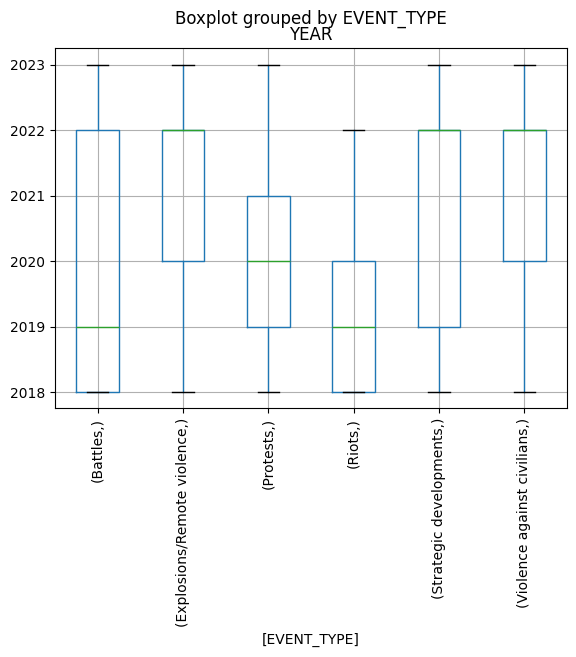

In [154]:

# Ящик с усами
df.boxplot(column=['YEAR'], by=['EVENT_TYPE'], rot=90)
plt.show()

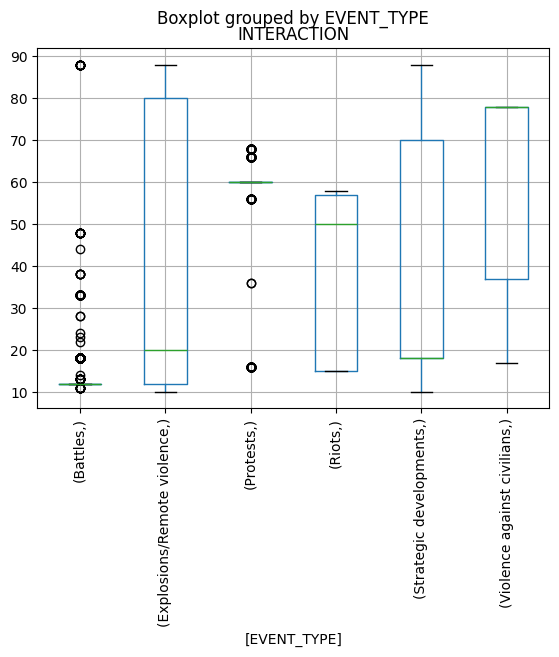

In [155]:

# Ящик с усами
df.boxplot(column=['INTERACTION'], by=['EVENT_TYPE'], rot=90)
plt.show()

In [167]:

df['EVENT_TYPE'] = pd.factorize(df['EVENT_TYPE'])[0]
normalized = preprocessing.normalize(df[['FATALITIES','YEAR', 'INTERACTION', 'EVENT_TYPE']])
df = pd.DataFrame(normalized, columns=['FATALITIES','YEAR', 'INTERACTION', 'EVENT_TYPE'])
df = df.dropna()
df

,FATALITIES,YEAR,INTERACTION,EVENT_TYPE
0,0.000000e+00,0.999965,8.419711e-03,0.000000
1,0.000000e+00,0.577327,5.139413e-03,0.816497
2,0.000000e+00,0.218122,6.472457e-03,0.975900
3,0.000000e+00,0.104826,6.739575e-04,0.994490
4,0.000000e+00,0.218122,6.472457e-03,0.975900
...,...,...,...,...
96077,0.000000e+00,0.000003,2.806994e-08,1.000000
96078,2.820799e-09,0.000003,2.538719e-08,1.000000
96079,0.000000e+00,0.000003,2.806994e-08,1.000000
96080,0.000000e+00,0.000003,2.806994e-08,1.000000


Text(0.5, 0, 'INTERACTION')

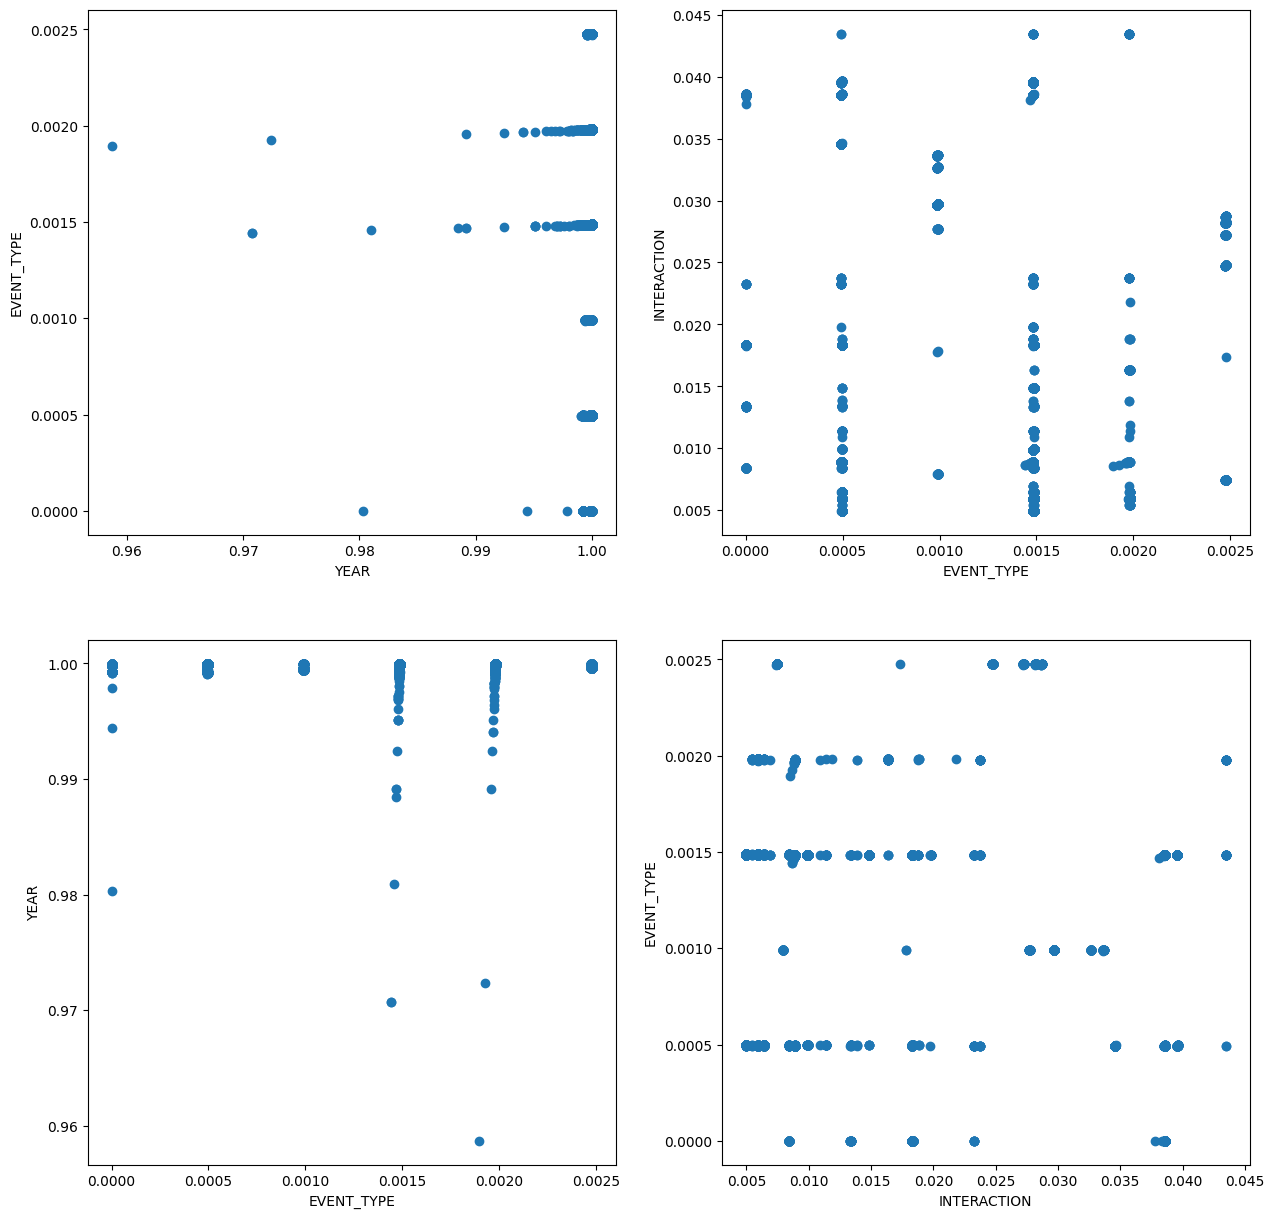

In [157]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
#Первый график рассеяния: смерти и тип события
ax[0][0].scatter(df["YEAR"], df["EVENT_TYPE"])
ax[0][0].set_xlabel("YEAR")
ax[0][0].set_ylabel("EVENT_TYPE")


#Второй график рассеяния: тип события и количество взаимодействий
ax[0][1].scatter(df["EVENT_TYPE"], df["INTERACTION"])
ax[0][1].set_xlabel("EVENT_TYPE")
ax[0][1].set_ylabel("INTERACTION")

#Первый график рассеяния: смерти и тип события
ax[1][0].scatter(df['EVENT_TYPE'], df['YEAR'])
ax[1][0].set_xlabel("EVENT_TYPE")
ax[1][0].set_ylabel("YEAR")

#Второй график рассеяния: тип события и количество взаимодействий
ax[1][1].scatter(df["INTERACTION"], df["EVENT_TYPE"])
ax[1][1].set_ylabel("EVENT_TYPE")
ax[1][1].set_xlabel("INTERACTION")



In [158]:
features = ['FATALITIES', 'YEAR', 'EVENT_TYPE']
target = 'INTERACTION'
X = df[features]
y = df[target]


In [159]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Разделяем данные на признаки (X) и целевую переменную (y)
X = df[['INTERACTION']]
y = df['EVENT_TYPE']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [160]:
x =X.to_numpy()
y = y.to_numpy()

# Создаем объект модели линейной регрессии
model = LinearRegression(fit_intercept=True)
# Обучаем модель
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [161]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.15883186860478182


Среднеквадратичная ошибка: 1.1333462723839935e-07


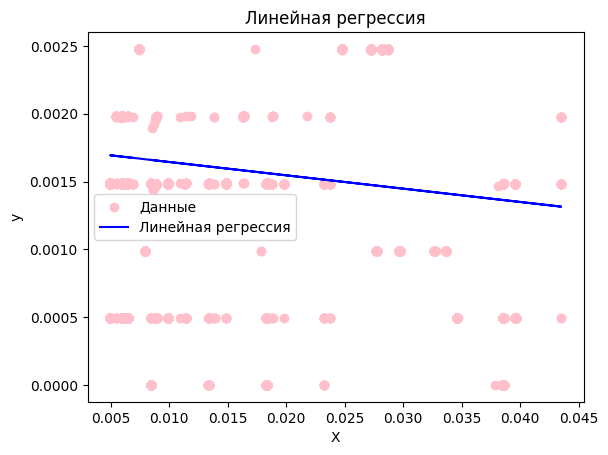

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['INTERACTION']]
y = df['EVENT_TYPE']

# Разбиваем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект линейной регрессии
regressor = LinearRegression()

# Обучаем модель на обучающей выборке
regressor.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

print("Среднеквадратичная ошибка:", mse)


egressor = LinearRegression()

# Обучаем модель на всех данных
regressor.fit(X, y)

# Предсказываем значения для всех данных
y_pred = regressor.predict(X)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X, y_pred, color='blue', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

In [163]:
import pandas as pd
from numpy import arange
from sklearn. linear_model import LassoCV
from sklearn. model_selection import RepeatedKFold

Веса признаков: [-0.]


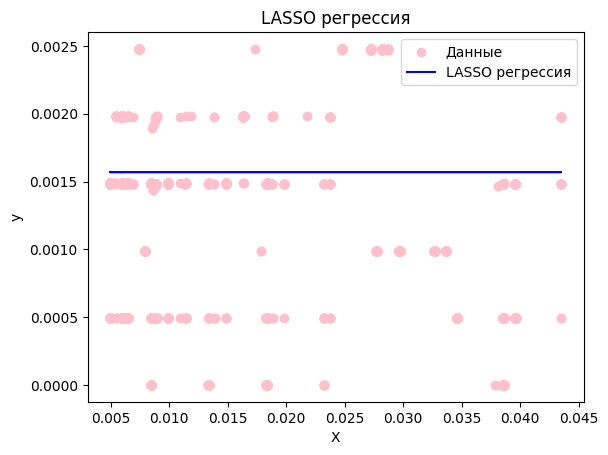

Среднеквадратичная ошибка: 1.349794500402948e-07


In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Создаем датасет с признаками X и целевой переменной y

X = df[['INTERACTION']]
y = df['EVENT_TYPE']

# Разбиваем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект LASSO регрессии
lasso = Lasso(alpha=0.1)

# Обучаем модель на обучающей выборке
lasso.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = lasso.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Выводим веса признаков
print("Веса признаков:", lasso.coef_)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X_test, y_pred, color='blue', label='LASSO регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('LASSO регрессия')
plt.legend()
plt.show()

print("Среднеквадратичная ошибка:", mse)

Веса признаков: [-0.00977112]


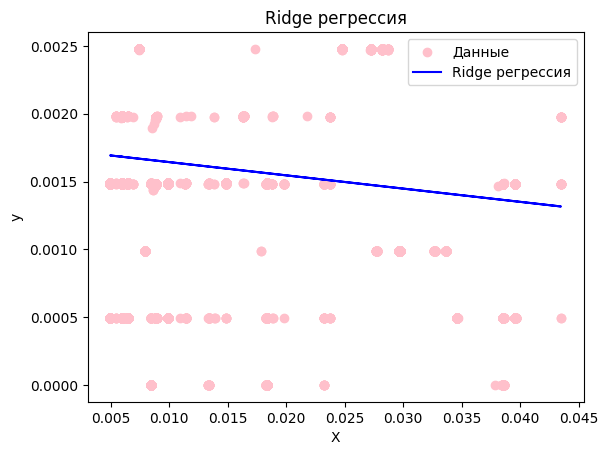

Среднеквадратичная ошибка: 1.1333528533574629e-07


In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df[['INTERACTION']]
y = df['EVENT_TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект Ridge регрессии
ridge = Ridge(alpha=0.1)

# Обучаем модель на обучающей выборке
ridge.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = ridge.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Выводим веса признаков
print("Веса признаков:", ridge.coef_)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X_test, y_pred, color='blue', label='Ridge регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge регрессия')
plt.legend()
plt.show()

print("Среднеквадратичная ошибка:", mse)